# Business Problem:

- Preventing the credit card frauds/unauthorized transactions, as it costs financial institutions millions of dollars each year and most of them are Card Not Present (CNP) type. So using the data the goal is to predict the future trasaction a genuine or a fraud

- The dataset we gonna work is taken from the kaggle which contains information about the transactions made in **September 2013, in Europe over two days**

In [1]:
import pandas as pd
import numpy as np
import math

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import missingno

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('credit_card.csv')
df_main = df.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print('The dataset consists of rows: {} and columns: {}'.format(df.shape[0], df.shape[1]))

The dataset consists of rows: 284807 and columns: 31


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

- A lot of variables we have in the dataset are not interpretable and are in such a way to ensure the privacy of customers, and these variables from V1 to V28 are principal components of the actual data
- Time represents the duration (in seconds) between the first transaction and the current transaction)
- Amount represents the transaction amount and Class denotes whether the transaction is fraud or genuine
- All the columns we have is of numerical data type

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


<Axes: >

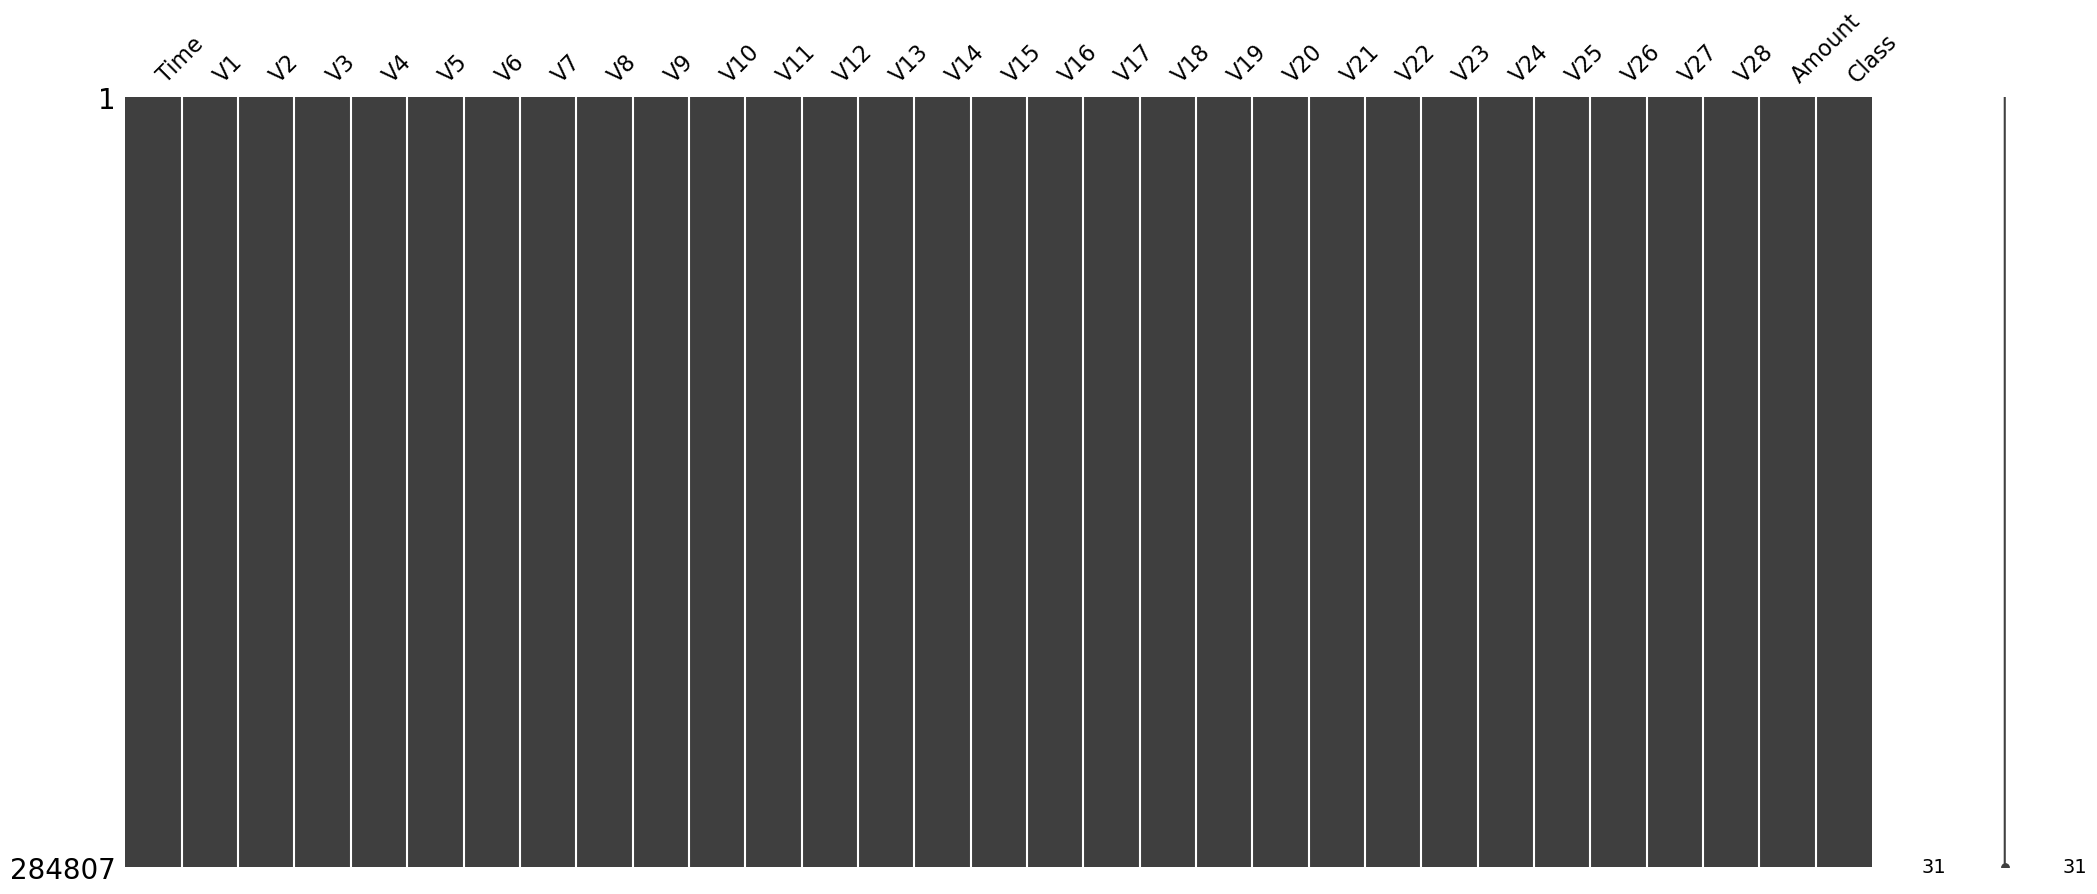

In [6]:
missingno.matrix(df)

In [7]:
df.duplicated().sum()

1081

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [10]:
genuine, fraud = df['Class'].value_counts()

In [11]:
genuine = (genuine/len(df['Class']))*100
fraud = (fraud/len(df['Class']))*100

print('The percentage of genuine data in the dataset accounts for {:.2f} and the fraud is about {:.2f}'.format(genuine, fraud))

The percentage of genuine data in the dataset accounts for 99.83 and the fraud is about 0.17


- The dataset we have is truly imbalanced where the fraud data is just about 0.17% of the dataset

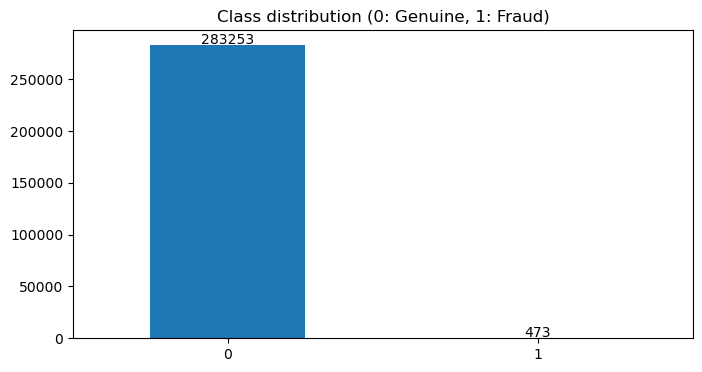

In [12]:
count = df['Class'].value_counts()
ax = count.plot(kind='bar', rot=0, figsize=(8,4))

plt.title('Class distribution (0: Genuine, 1: Fraud)')

for i,v in enumerate(count):
    ax.text(i, v+1200, str(v), ha='center', fontsize=10)

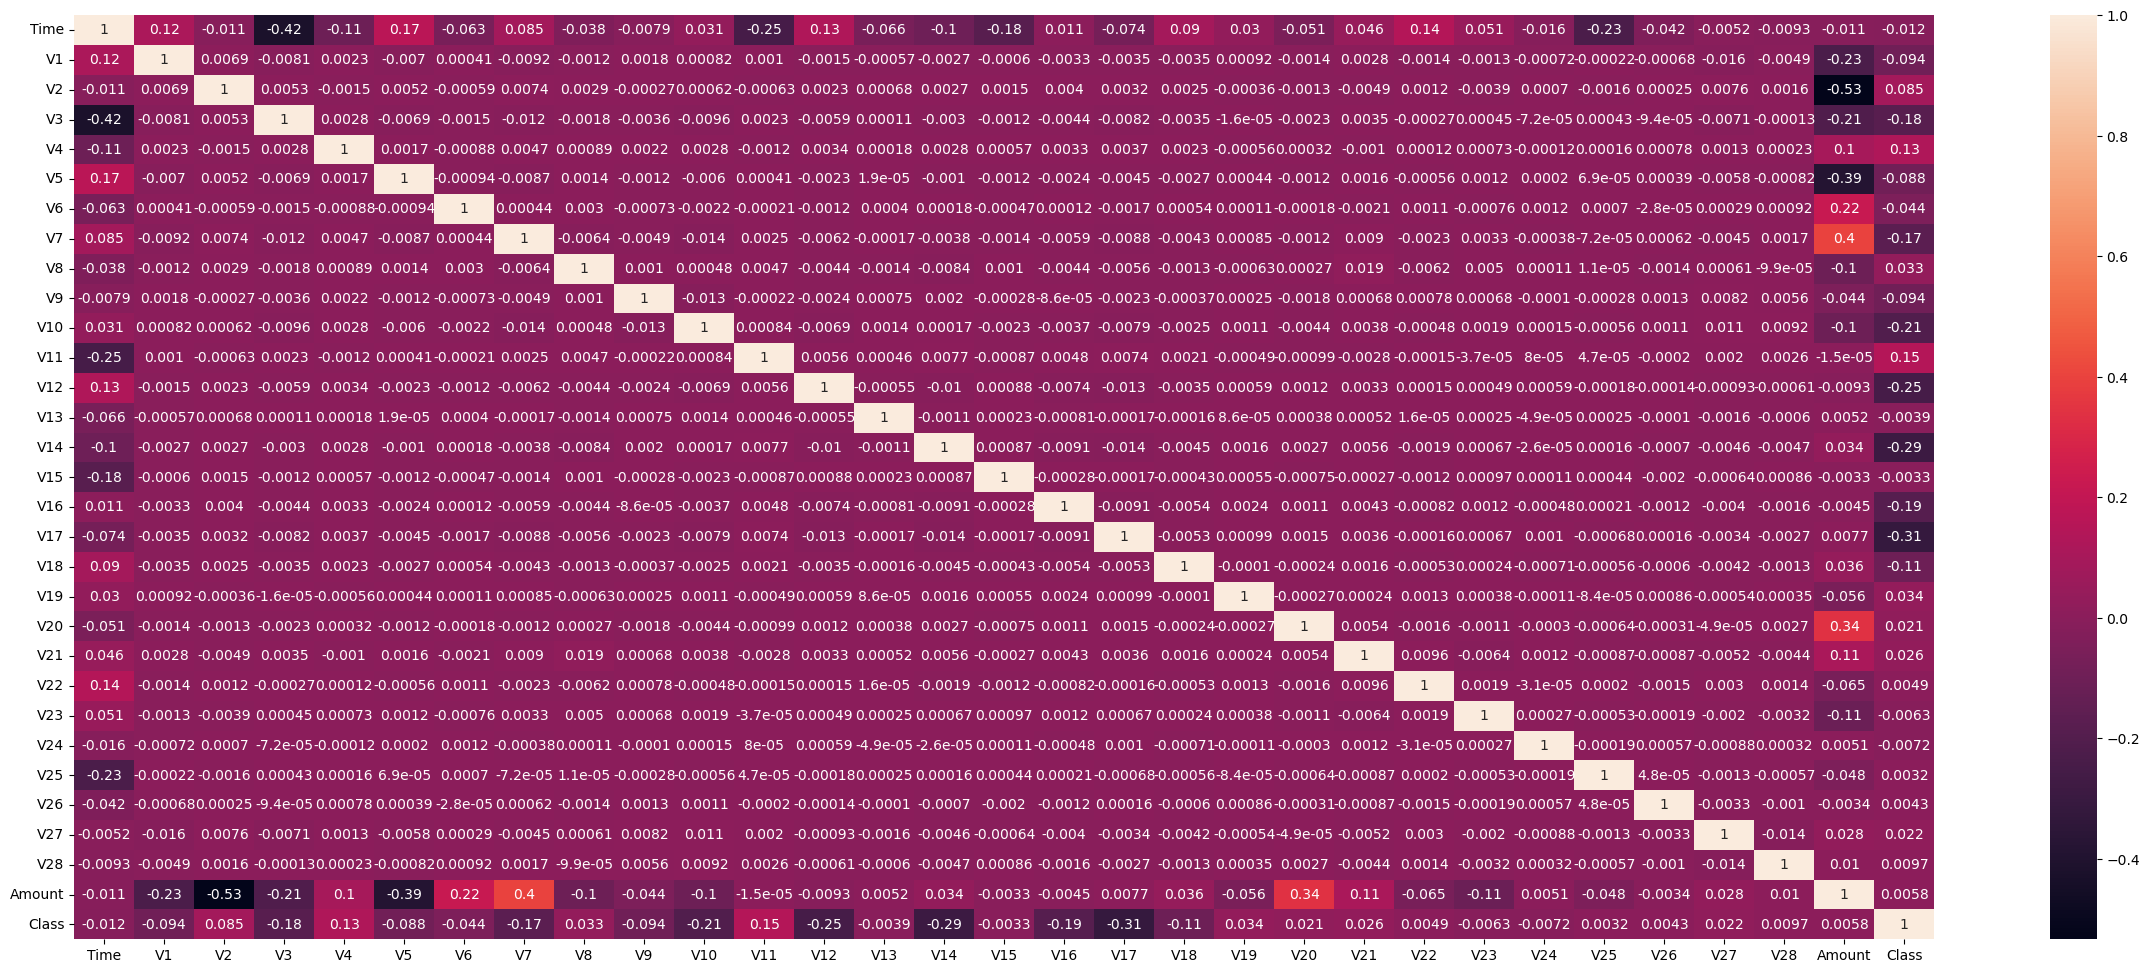

In [13]:
plt.figure(figsize=(30,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

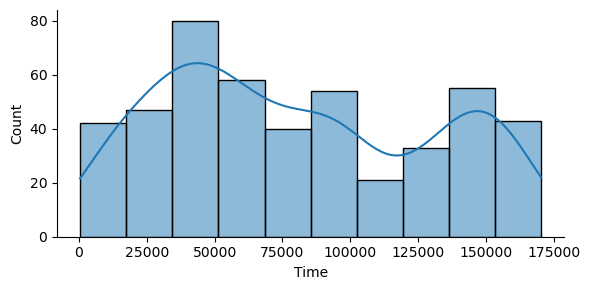

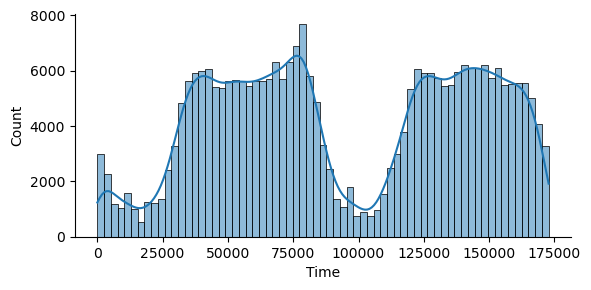

In [14]:
fraud = df[df['Class']==1]['Time']
genuine = df[df['Class']==0]['Time']


sns.displot(fraud, kde=True, height=3, aspect=2)
sns.displot(genuine, kde=True, height=3, aspect=2)

plt.show()

- If we observe the plots most of the frauds are occuring during the mid-day

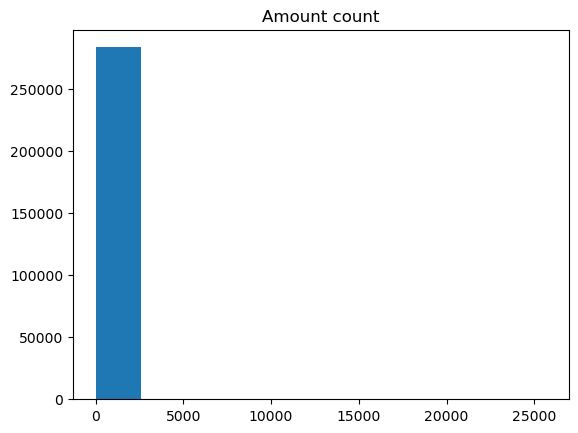

In [15]:
count = df['Amount']
plt.hist(count)
plt.title('Amount count')

plt.show()

In [16]:
df['Amount'].skew()

16.978803370060476

- The amount feature is a right skewed distribution

In [17]:
df['Time_Hours'] = df['Time'].apply(lambda x: np.floor(x/3600))

In [18]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hours
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,47.0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,47.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,47.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,47.0


In [19]:
fraud_amount = pd.DataFrame(df[df['Class']==1][['Time_Hours', 'Amount']].groupby('Time_Hours')['Amount'].sum())
fraud_amount.reset_index(inplace=True)
nonfraud_amount = pd.DataFrame(df[df['Class']==0][['Time_Hours', 'Amount']].groupby('Time_Hours')['Amount'].sum())
nonfraud_amount.reset_index(inplace=True)

In [20]:
fraud_average = pd.DataFrame(df[df['Class']==1][['Time_Hours', 'Amount']].groupby('Time_Hours')['Amount'].mean())
fraud_average.reset_index(inplace=True)
nonfraud_average = pd.DataFrame(df[df['Class']==0][['Time_Hours', 'Amount']].groupby('Time_Hours')['Amount'].mean())
nonfraud_average.reset_index(inplace=True)

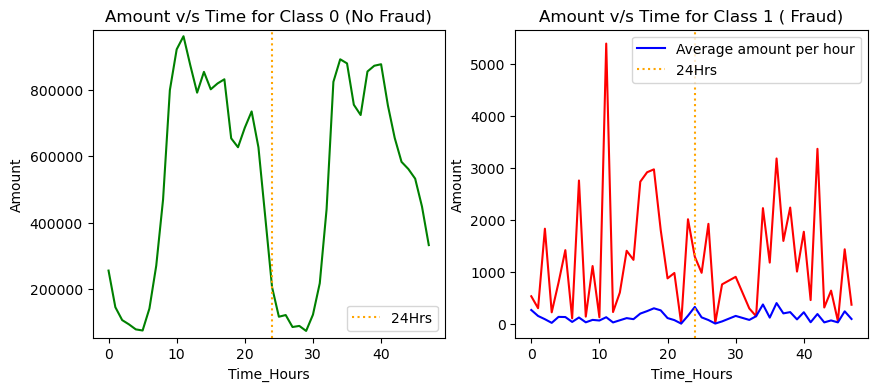

In [21]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.lineplot(data=nonfraud_amount, x='Time_Hours', y='Amount', color='green')
plt.title('Amount v/s Time for Class 0 (No Fraud)')
plt.ylim(nonfraud_amount['Amount'].min()-20000, nonfraud_amount['Amount'].max()+20000)
plt.axvline(x=24, ls=':', c='orange', label='24Hrs')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
sns.lineplot(data=fraud_amount, x='Time_Hours', y='Amount', color='red')
sns.lineplot(data=fraud_average, x='Time_Hours', y='Amount', color='blue', label='Average amount per hour')
plt.title('Amount v/s Time for Class 1 ( Fraud)')
plt.axvline(x=24, ls=':', c='orange', label='24Hrs')

plt.legend()
plt.show()

In [22]:
max_0 = nonfraud_amount['Amount'].max()
min_0 = nonfraud_amount['Amount'].min()

max_1 = fraud_amount['Amount'].max()
min_1 = fraud_amount['Amount'].min()

print('The maximum amount transacted in an hour for nonfraud is {} and the minimum amount is {}'.format(max_0, min_0))
print('The maximum amount transacted in an hour for fraud is {} and the minimum amount is {}'.format(max_1, min_1))

The maximum amount transacted in an hour for nonfraud is 960458.91 and the minimum amount is 74394.26
The maximum amount transacted in an hour for fraud is 5393.83 and the minimum amount is 8.77


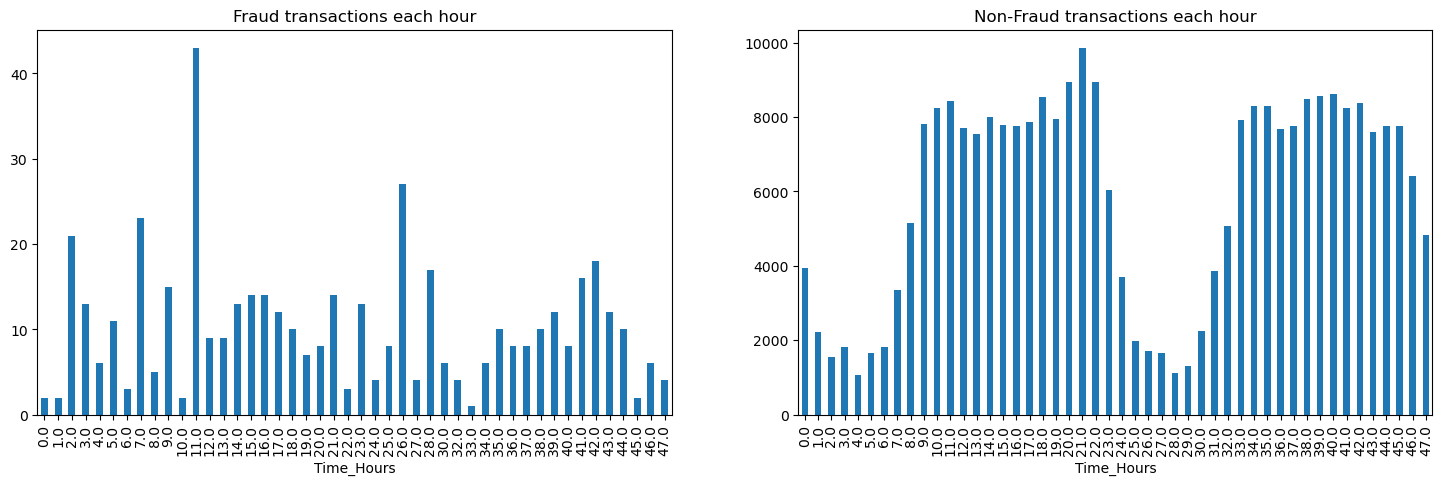

In [23]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
df[df['Class']==1].groupby('Time_Hours')['Class'].size().plot(kind='bar')
plt.title('Fraud transactions each hour')

plt.subplot(1,2,2)
df[df['Class']==0].groupby('Time_Hours')['Class'].size().plot(kind='bar')
plt.title('Non-Fraud transactions each hour')

plt.show()

### Converting imbalanced data to balanced data 

In [24]:
fraud_df = df[df['Class']==1]
nonfraud_df = df[df['Class']==0]

In [25]:
 fraud_df.shape

(473, 32)

In [26]:
nonfraud_df.shape

(283253, 32)

In [27]:
X = df.drop(['Time_Hours', 'Class'], axis=1)
y = df.Class

In [28]:
smote = SMOTE()

X, y = smote.fit_resample(X,y)

In [29]:
bd = pd.concat([X,y], axis=1)

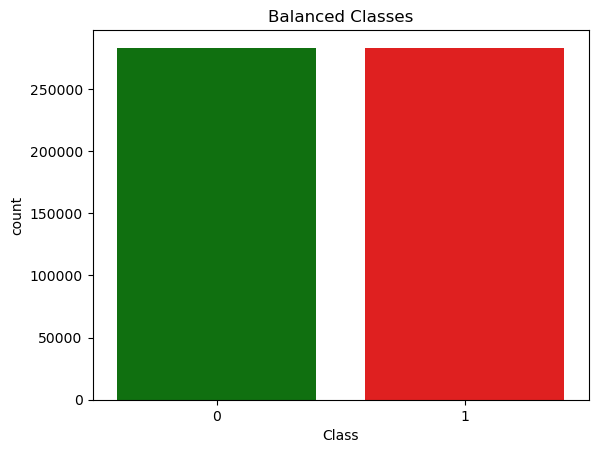

In [30]:
sns.countplot(x=y, palette=['g', 'r'])
plt.title('Balanced Classes', fontsize=12)
plt.show()

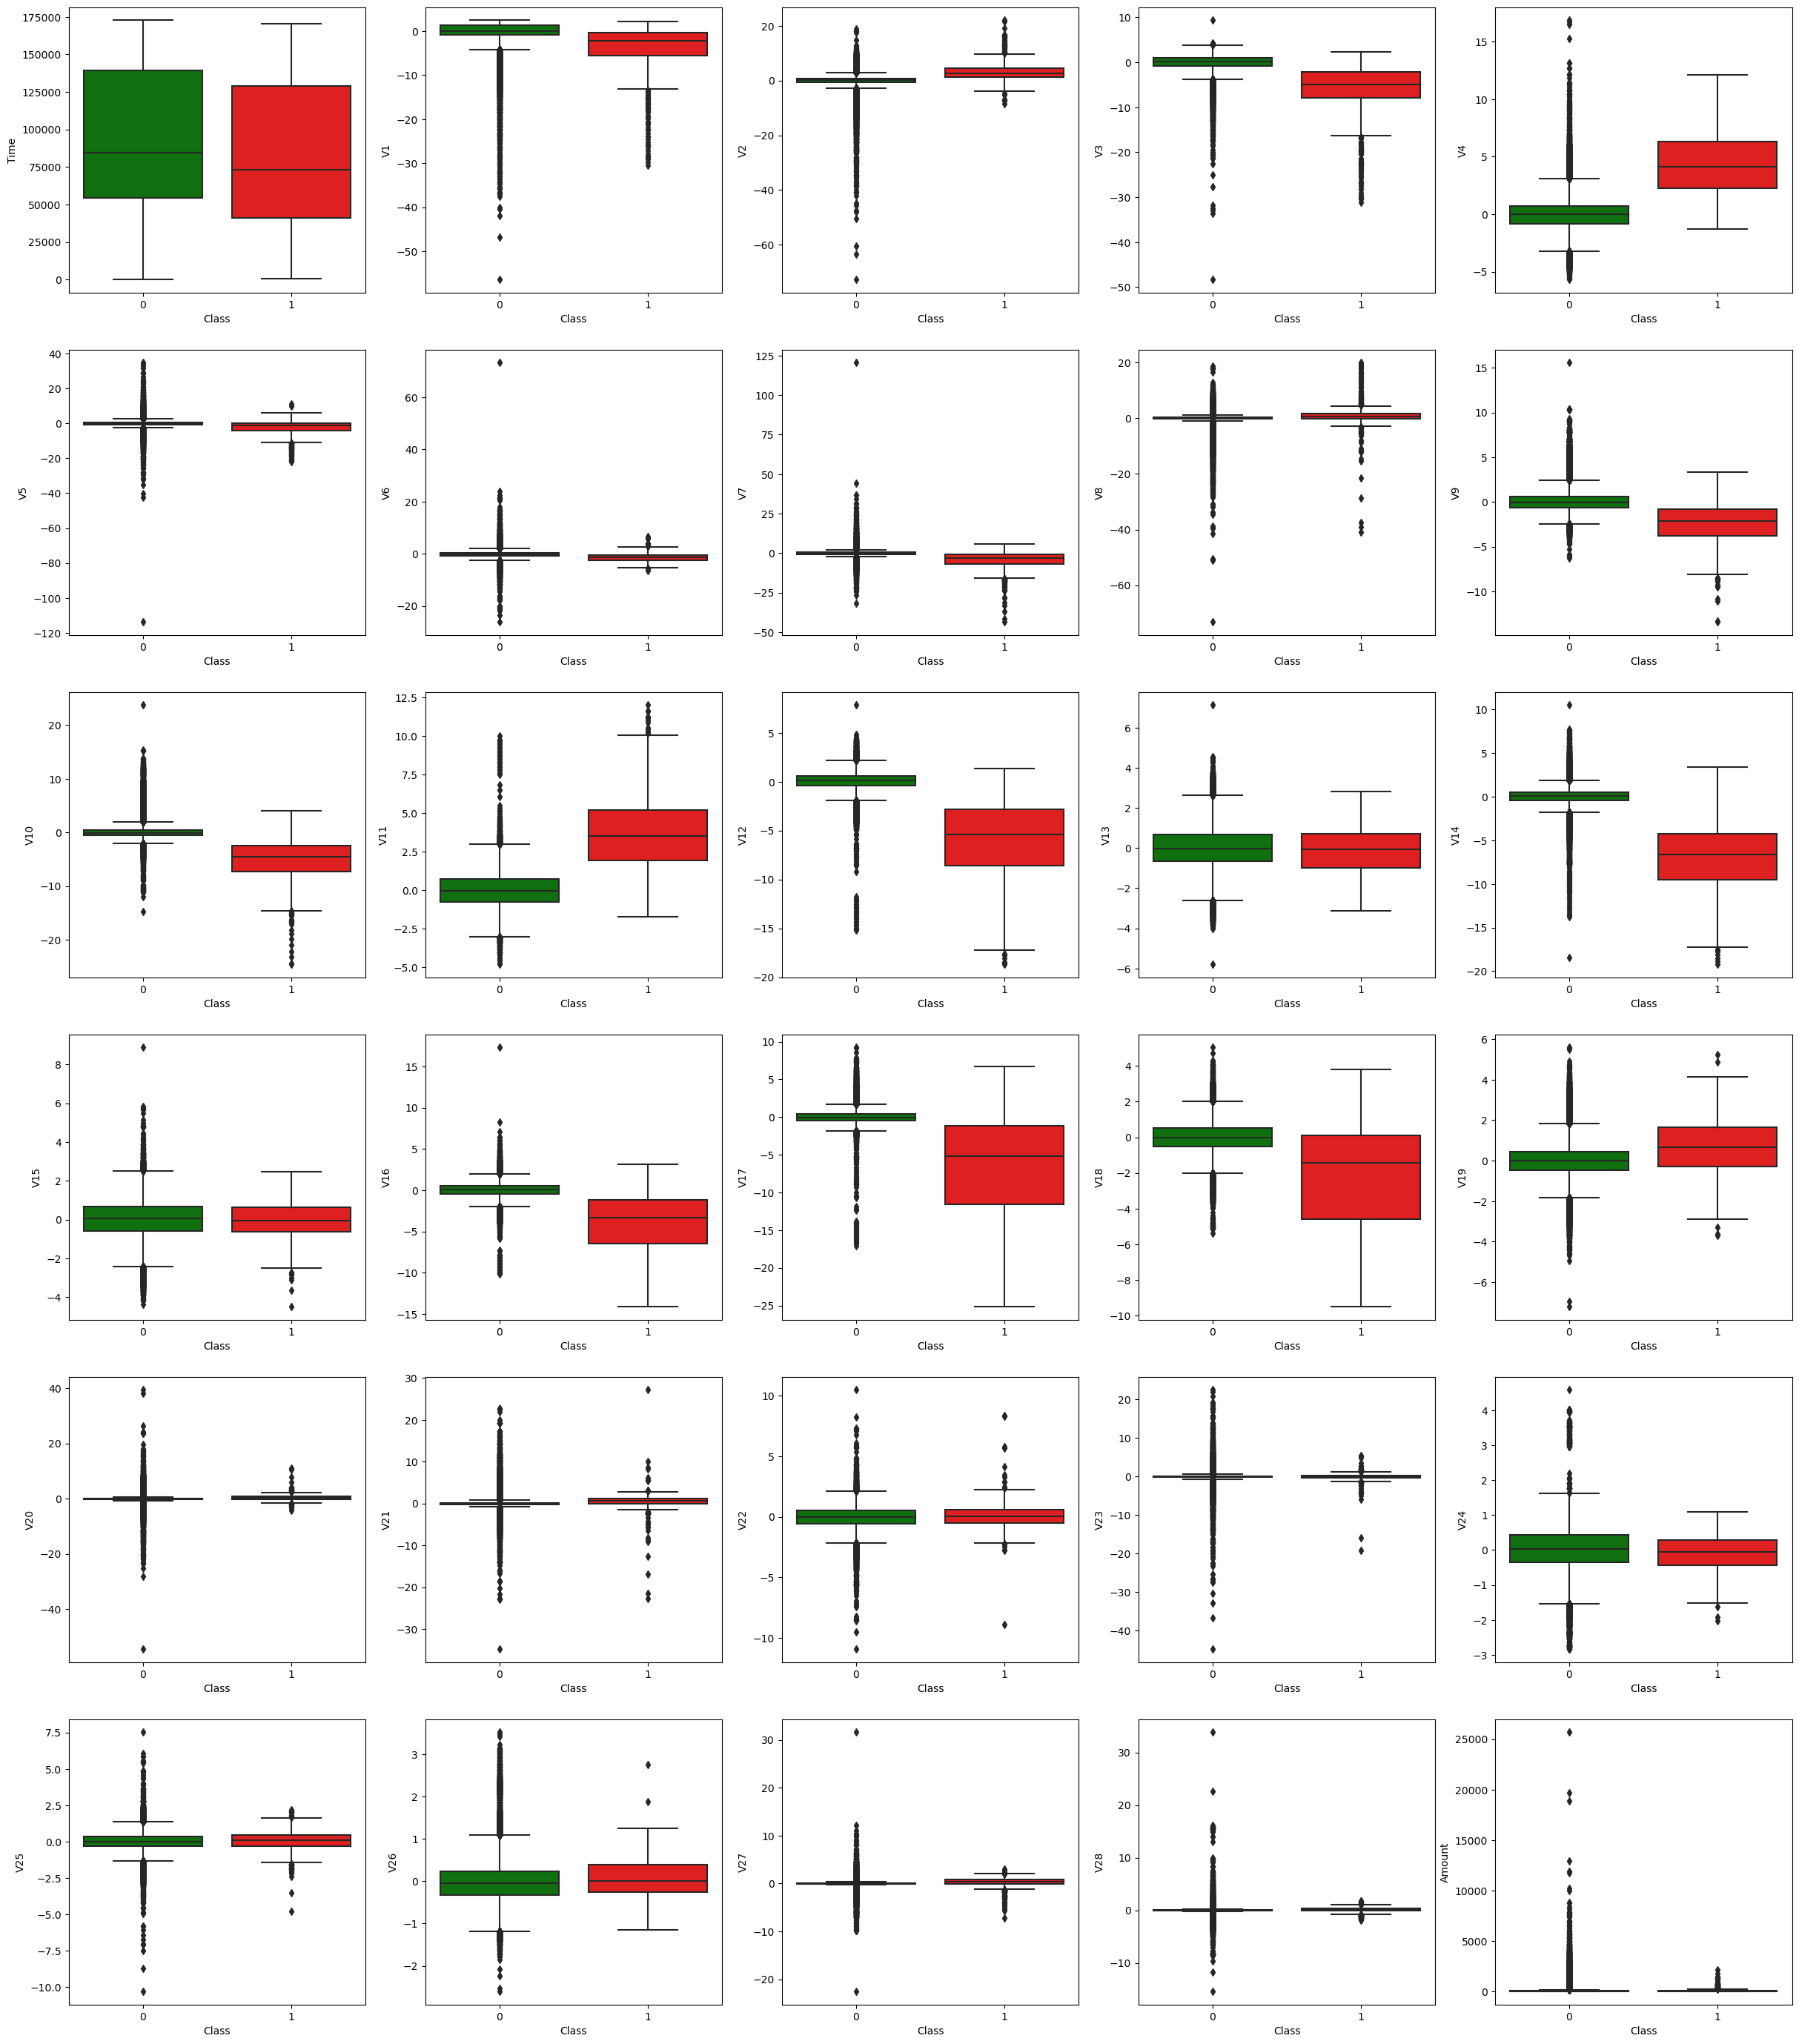

In [31]:
plt.figure(figsize=(30,35))
j = 1
for i in X.columns:
    plt.subplot(6,5,j)
    sns.boxplot(data=df,x = 'Class', y=i, palette = ['g', 'r'])  
    
    j+=1
    
plt.show()

- For better understanding the correlation of feature with Class lets break it down in to positive and negative correlations:
    - *Positive corr:*
        - V2, V4, V11, V19 have positive correlation with class as can be clearly seen from the above
        - The higher these values are the more likely the transaction is fraud
    - *Negative corr:*
        - V10, V12, V14, V17 have negative correlation with class
        - The lower these values are the more likely the transaction is fraud

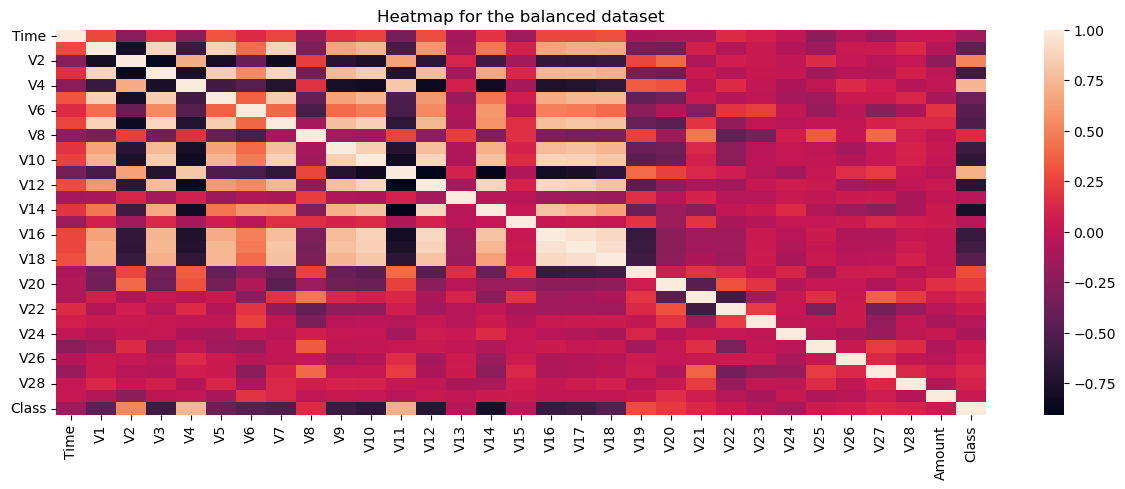

In [32]:
plt.figure(figsize=(15,5))
sns.heatmap(bd.corr())
plt.title('Heatmap for the balanced dataset')

plt.show()

In [33]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566501,48382.027520,-2.737305,-1.437914,1.010359,1.911919,-0.082466,-0.480075,0.771037,-0.343653,0.602759,...,-1.360750,-0.388148,0.433074,0.764798,0.400848,0.250359,-0.159825,0.060346,0.352760,205.829198
566502,41154.975217,-5.724693,4.355578,-8.683024,7.912503,-6.148104,-2.966763,-10.761794,3.621810,-6.334209,...,0.948321,2.271366,0.602420,-0.326351,0.544804,-0.201849,0.240494,1.957282,0.337055,86.548270
566503,94930.339061,0.899379,-0.339658,-2.333175,4.752436,0.799614,-0.380988,1.228163,-0.445090,-0.046515,...,0.857945,-0.102574,-1.138164,-0.296886,-0.458966,-0.210405,-0.239158,-0.134492,0.092984,535.860672
566504,100783.784993,-13.546685,10.032320,-11.839919,6.829828,-5.256489,1.232617,-15.790638,-13.362201,-3.829750,...,1.941082,-2.338827,0.646252,1.039685,0.097633,0.137052,0.022200,-1.528233,1.003524,1.289351


In [34]:
X.shape

(566506, 30)

In [35]:
y.shape

(566506,)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

models = {
    "Logisitic_Regression": LogisticRegression(),
    "K_Nearest_Neighbors": KNeighborsClassifier(),
    "Support_Vector_Classifier": SVC(),
    "Decision_Tree_Classifier": DecisionTreeClassifier(),
    'Random_Forest_Classifier': RandomForestClassifier(),
    'Ada Boost Classifier': AdaBoostClassifier(),
    'Gradient_Boosting_Classifier': GradientBoostingClassifier()
}

In [37]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
X = ss.transform(X)

In [38]:
accuracies = {}

for model,clf in models.items():
    model_clf = clf
    model_clf.fit(X_train, y_train)

    model_scores = {}
    
    y_test_pred = model_clf.predict(X_test)
    y_train_pred = model_clf.predict(X_train)
    cvs = cross_val_score(model_clf, X, y, cv=5)
    print('-'*15, model)
    print('Test Score:',accuracy_score(y_test_pred, y_test), '\nCVS:', cvs.mean(),
          '\nTrain Score:',accuracy_score(y_train_pred, y_train))
    print('Classification Report:\n',classification_report(y_test_pred, y_test))
    print('Confusion Matrix:\n',confusion_matrix(y_test_pred, y_test))
    
    model_scores['Test_sc'] = accuracy_score(y_test_pred, y_test)
    model_scores['Train_sc'] = accuracy_score(y_train_pred, y_train)
    model_scores['CVS'] = cvs.mean()
    accuracies[model] = model_scores
    
    print('*'*100)

--------------- Logisitic_Regression
Test Score: 0.9793648832324231 
CVS: 0.9762262134487087 
Train Score: 0.9789542899003539
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     57736
           1       0.97      0.99      0.98     55566

    accuracy                           0.98    113302
   macro avg       0.98      0.98      0.98    113302
weighted avg       0.98      0.98      0.98    113302

Confusion Matrix:
 [[55896  1840]
 [  498 55068]]
****************************************************************************************************
--------------- K_Nearest_Neighbors
Test Score: 0.9991438809553229 
CVS: 0.9969232546661919 
Train Score: 0.9994417524999779
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56297
           1       1.00      1.00      1.00     57005

    accuracy                           1.00    113302
   ma

In [40]:
models_new = {'Cat Boost Classifier': CatBoostClassifier(), 'Light GBM':LGBMClassifier()}

for model,clf in models_new.items():
    model_clf = clf
    model_clf.fit(X_train, y_train)

    model_scores = {}
    
    y_test_pred = model_clf.predict(X_test)
    cvs = cross_val_score(model_clf, X, y, cv=5)
    print('-'*15, model)
    print('Test Score:',accuracy_score(y_test_pred, y_test), '\nCVS:', cvs.mean(),
          '\nTrain Score:',accuracy_score(y_train_pred, y_train))
    print('Classification Report:\n',classification_report(y_test_pred, y_test))
    print('Confusion Matrix:\n',confusion_matrix(y_test_pred, y_test))
    
    model_scores['Test_sc'] = accuracy_score(y_test_pred, y_test)
    model_scores['Train_sc'] = accuracy_score(y_train_pred, y_train)
    model_scores['CVS'] = cvs.mean()
    accuracies[model] = model_scores
    
    print('*'*100)

Learning rate set to 0.140337
0:	learn: 0.4238498	total: 858ms	remaining: 14m 17s
1:	learn: 0.2690884	total: 1.1s	remaining: 9m 7s
2:	learn: 0.1930785	total: 1.3s	remaining: 7m 12s
3:	learn: 0.1549284	total: 1.55s	remaining: 6m 27s
4:	learn: 0.1304614	total: 1.75s	remaining: 5m 49s
5:	learn: 0.1143962	total: 1.99s	remaining: 5m 29s
6:	learn: 0.1009165	total: 2.19s	remaining: 5m 10s
7:	learn: 0.0931851	total: 2.44s	remaining: 5m 2s
8:	learn: 0.0881352	total: 2.66s	remaining: 4m 52s
9:	learn: 0.0816550	total: 2.94s	remaining: 4m 50s
10:	learn: 0.0770078	total: 3.23s	remaining: 4m 50s
11:	learn: 0.0744133	total: 3.43s	remaining: 4m 42s
12:	learn: 0.0700194	total: 3.65s	remaining: 4m 36s
13:	learn: 0.0667957	total: 3.84s	remaining: 4m 30s
14:	learn: 0.0644088	total: 4.08s	remaining: 4m 28s
15:	learn: 0.0604972	total: 4.29s	remaining: 4m 24s
16:	learn: 0.0578144	total: 4.53s	remaining: 4m 22s
17:	learn: 0.0559903	total: 4.73s	remaining: 4m 18s
18:	learn: 0.0541482	total: 4.96s	remaining: 4m

158:	learn: 0.0043604	total: 35.2s	remaining: 3m 6s
159:	learn: 0.0042779	total: 35.5s	remaining: 3m 6s
160:	learn: 0.0042332	total: 35.7s	remaining: 3m 6s
161:	learn: 0.0042195	total: 35.9s	remaining: 3m 5s
162:	learn: 0.0041774	total: 36.2s	remaining: 3m 5s
163:	learn: 0.0041534	total: 36.4s	remaining: 3m 5s
164:	learn: 0.0041243	total: 36.6s	remaining: 3m 5s
165:	learn: 0.0041243	total: 36.8s	remaining: 3m 4s
166:	learn: 0.0041243	total: 37s	remaining: 3m 4s
167:	learn: 0.0041243	total: 37.1s	remaining: 3m 3s
168:	learn: 0.0041243	total: 37.3s	remaining: 3m 3s
169:	learn: 0.0041243	total: 37.5s	remaining: 3m 3s
170:	learn: 0.0041243	total: 37.7s	remaining: 3m 2s
171:	learn: 0.0041243	total: 37.8s	remaining: 3m 2s
172:	learn: 0.0041243	total: 38s	remaining: 3m 1s
173:	learn: 0.0041243	total: 38.2s	remaining: 3m 1s
174:	learn: 0.0040770	total: 38.5s	remaining: 3m 1s
175:	learn: 0.0040770	total: 38.6s	remaining: 3m
176:	learn: 0.0040770	total: 38.8s	remaining: 3m
177:	learn: 0.0040770	

314:	learn: 0.0036056	total: 1m 6s	remaining: 2m 23s
315:	learn: 0.0036056	total: 1m 6s	remaining: 2m 23s
316:	learn: 0.0036056	total: 1m 6s	remaining: 2m 23s
317:	learn: 0.0036056	total: 1m 6s	remaining: 2m 22s
318:	learn: 0.0036056	total: 1m 6s	remaining: 2m 22s
319:	learn: 0.0036056	total: 1m 6s	remaining: 2m 22s
320:	learn: 0.0036056	total: 1m 7s	remaining: 2m 22s
321:	learn: 0.0036056	total: 1m 7s	remaining: 2m 21s
322:	learn: 0.0036056	total: 1m 7s	remaining: 2m 21s
323:	learn: 0.0036056	total: 1m 7s	remaining: 2m 21s
324:	learn: 0.0036056	total: 1m 7s	remaining: 2m 21s
325:	learn: 0.0036056	total: 1m 8s	remaining: 2m 20s
326:	learn: 0.0036056	total: 1m 8s	remaining: 2m 20s
327:	learn: 0.0036056	total: 1m 8s	remaining: 2m 20s
328:	learn: 0.0036056	total: 1m 8s	remaining: 2m 20s
329:	learn: 0.0036056	total: 1m 8s	remaining: 2m 19s
330:	learn: 0.0036056	total: 1m 9s	remaining: 2m 19s
331:	learn: 0.0036056	total: 1m 9s	remaining: 2m 19s
332:	learn: 0.0036056	total: 1m 9s	remaining: 

468:	learn: 0.0036056	total: 1m 35s	remaining: 1m 48s
469:	learn: 0.0036056	total: 1m 35s	remaining: 1m 47s
470:	learn: 0.0036056	total: 1m 35s	remaining: 1m 47s
471:	learn: 0.0036056	total: 1m 36s	remaining: 1m 47s
472:	learn: 0.0036056	total: 1m 36s	remaining: 1m 47s
473:	learn: 0.0036056	total: 1m 36s	remaining: 1m 46s
474:	learn: 0.0036056	total: 1m 36s	remaining: 1m 46s
475:	learn: 0.0036056	total: 1m 36s	remaining: 1m 46s
476:	learn: 0.0036056	total: 1m 36s	remaining: 1m 46s
477:	learn: 0.0036056	total: 1m 37s	remaining: 1m 46s
478:	learn: 0.0036056	total: 1m 37s	remaining: 1m 45s
479:	learn: 0.0036056	total: 1m 37s	remaining: 1m 45s
480:	learn: 0.0036056	total: 1m 37s	remaining: 1m 45s
481:	learn: 0.0036056	total: 1m 37s	remaining: 1m 45s
482:	learn: 0.0036056	total: 1m 38s	remaining: 1m 45s
483:	learn: 0.0036056	total: 1m 38s	remaining: 1m 44s
484:	learn: 0.0036056	total: 1m 38s	remaining: 1m 44s
485:	learn: 0.0036056	total: 1m 38s	remaining: 1m 44s
486:	learn: 0.0036056	total:

622:	learn: 0.0036056	total: 2m 5s	remaining: 1m 15s
623:	learn: 0.0036056	total: 2m 5s	remaining: 1m 15s
624:	learn: 0.0036056	total: 2m 5s	remaining: 1m 15s
625:	learn: 0.0036056	total: 2m 5s	remaining: 1m 15s
626:	learn: 0.0036056	total: 2m 6s	remaining: 1m 14s
627:	learn: 0.0036056	total: 2m 6s	remaining: 1m 14s
628:	learn: 0.0036056	total: 2m 6s	remaining: 1m 14s
629:	learn: 0.0036056	total: 2m 6s	remaining: 1m 14s
630:	learn: 0.0036056	total: 2m 6s	remaining: 1m 14s
631:	learn: 0.0036056	total: 2m 6s	remaining: 1m 13s
632:	learn: 0.0036056	total: 2m 7s	remaining: 1m 13s
633:	learn: 0.0036056	total: 2m 7s	remaining: 1m 13s
634:	learn: 0.0036056	total: 2m 7s	remaining: 1m 13s
635:	learn: 0.0036056	total: 2m 7s	remaining: 1m 13s
636:	learn: 0.0036056	total: 2m 7s	remaining: 1m 12s
637:	learn: 0.0036056	total: 2m 8s	remaining: 1m 12s
638:	learn: 0.0036056	total: 2m 8s	remaining: 1m 12s
639:	learn: 0.0036056	total: 2m 8s	remaining: 1m 12s
640:	learn: 0.0036056	total: 2m 8s	remaining: 

778:	learn: 0.0036056	total: 2m 35s	remaining: 44.1s
779:	learn: 0.0036056	total: 2m 35s	remaining: 43.9s
780:	learn: 0.0036056	total: 2m 35s	remaining: 43.7s
781:	learn: 0.0036056	total: 2m 36s	remaining: 43.5s
782:	learn: 0.0036056	total: 2m 36s	remaining: 43.3s
783:	learn: 0.0036056	total: 2m 36s	remaining: 43.1s
784:	learn: 0.0036056	total: 2m 36s	remaining: 42.9s
785:	learn: 0.0036056	total: 2m 36s	remaining: 42.7s
786:	learn: 0.0036056	total: 2m 37s	remaining: 42.5s
787:	learn: 0.0036056	total: 2m 37s	remaining: 42.3s
788:	learn: 0.0036056	total: 2m 37s	remaining: 42.1s
789:	learn: 0.0036056	total: 2m 37s	remaining: 41.9s
790:	learn: 0.0036056	total: 2m 37s	remaining: 41.7s
791:	learn: 0.0036056	total: 2m 37s	remaining: 41.5s
792:	learn: 0.0036056	total: 2m 38s	remaining: 41.3s
793:	learn: 0.0036056	total: 2m 38s	remaining: 41.1s
794:	learn: 0.0036056	total: 2m 38s	remaining: 40.9s
795:	learn: 0.0036056	total: 2m 38s	remaining: 40.7s
796:	learn: 0.0036056	total: 2m 38s	remaining:

934:	learn: 0.0036056	total: 3m 6s	remaining: 13s
935:	learn: 0.0036056	total: 3m 6s	remaining: 12.8s
936:	learn: 0.0036056	total: 3m 7s	remaining: 12.6s
937:	learn: 0.0036056	total: 3m 7s	remaining: 12.4s
938:	learn: 0.0036056	total: 3m 7s	remaining: 12.2s
939:	learn: 0.0036056	total: 3m 7s	remaining: 12s
940:	learn: 0.0036056	total: 3m 7s	remaining: 11.8s
941:	learn: 0.0036056	total: 3m 8s	remaining: 11.6s
942:	learn: 0.0036056	total: 3m 8s	remaining: 11.4s
943:	learn: 0.0036056	total: 3m 8s	remaining: 11.2s
944:	learn: 0.0036056	total: 3m 8s	remaining: 11s
945:	learn: 0.0036056	total: 3m 8s	remaining: 10.8s
946:	learn: 0.0036056	total: 3m 8s	remaining: 10.6s
947:	learn: 0.0036056	total: 3m 9s	remaining: 10.4s
948:	learn: 0.0036056	total: 3m 9s	remaining: 10.2s
949:	learn: 0.0036056	total: 3m 9s	remaining: 9.98s
950:	learn: 0.0036056	total: 3m 9s	remaining: 9.78s
951:	learn: 0.0036056	total: 3m 9s	remaining: 9.58s
952:	learn: 0.0036056	total: 3m 10s	remaining: 9.38s
953:	learn: 0.003

92:	learn: 0.0079617	total: 25s	remaining: 4m 3s
93:	learn: 0.0078546	total: 25.3s	remaining: 4m 3s
94:	learn: 0.0076970	total: 25.7s	remaining: 4m 4s
95:	learn: 0.0075734	total: 26s	remaining: 4m 5s
96:	learn: 0.0074062	total: 26.4s	remaining: 4m 5s
97:	learn: 0.0071952	total: 26.8s	remaining: 4m 6s
98:	learn: 0.0070164	total: 27.2s	remaining: 4m 7s
99:	learn: 0.0069478	total: 27.5s	remaining: 4m 7s
100:	learn: 0.0067747	total: 27.9s	remaining: 4m 7s
101:	learn: 0.0067245	total: 28.2s	remaining: 4m 8s
102:	learn: 0.0067064	total: 28.6s	remaining: 4m 8s
103:	learn: 0.0065771	total: 28.8s	remaining: 4m 8s
104:	learn: 0.0064656	total: 29.1s	remaining: 4m 8s
105:	learn: 0.0064101	total: 29.4s	remaining: 4m 7s
106:	learn: 0.0063228	total: 29.7s	remaining: 4m 8s
107:	learn: 0.0062037	total: 30.1s	remaining: 4m 8s
108:	learn: 0.0060052	total: 30.5s	remaining: 4m 9s
109:	learn: 0.0057964	total: 30.9s	remaining: 4m 9s
110:	learn: 0.0056849	total: 31.2s	remaining: 4m 9s
111:	learn: 0.0055954	to

250:	learn: 0.0022718	total: 1m 4s	remaining: 3m 13s
251:	learn: 0.0022718	total: 1m 4s	remaining: 3m 12s
252:	learn: 0.0022718	total: 1m 5s	remaining: 3m 12s
253:	learn: 0.0022718	total: 1m 5s	remaining: 3m 11s
254:	learn: 0.0022718	total: 1m 5s	remaining: 3m 11s
255:	learn: 0.0022518	total: 1m 5s	remaining: 3m 11s
256:	learn: 0.0022518	total: 1m 5s	remaining: 3m 10s
257:	learn: 0.0022518	total: 1m 6s	remaining: 3m 10s
258:	learn: 0.0022518	total: 1m 6s	remaining: 3m 9s
259:	learn: 0.0022518	total: 1m 6s	remaining: 3m 9s
260:	learn: 0.0022518	total: 1m 6s	remaining: 3m 8s
261:	learn: 0.0022518	total: 1m 6s	remaining: 3m 8s
262:	learn: 0.0022518	total: 1m 7s	remaining: 3m 8s
263:	learn: 0.0022518	total: 1m 7s	remaining: 3m 7s
264:	learn: 0.0022517	total: 1m 7s	remaining: 3m 7s
265:	learn: 0.0022517	total: 1m 7s	remaining: 3m 6s
266:	learn: 0.0022517	total: 1m 7s	remaining: 3m 6s
267:	learn: 0.0022517	total: 1m 8s	remaining: 3m 5s
268:	learn: 0.0022516	total: 1m 8s	remaining: 3m 5s
269:

403:	learn: 0.0020264	total: 1m 37s	remaining: 2m 23s
404:	learn: 0.0020264	total: 1m 37s	remaining: 2m 23s
405:	learn: 0.0020264	total: 1m 37s	remaining: 2m 23s
406:	learn: 0.0020264	total: 1m 38s	remaining: 2m 22s
407:	learn: 0.0020264	total: 1m 38s	remaining: 2m 22s
408:	learn: 0.0020264	total: 1m 38s	remaining: 2m 22s
409:	learn: 0.0020264	total: 1m 38s	remaining: 2m 22s
410:	learn: 0.0020264	total: 1m 38s	remaining: 2m 21s
411:	learn: 0.0020264	total: 1m 39s	remaining: 2m 21s
412:	learn: 0.0020264	total: 1m 39s	remaining: 2m 21s
413:	learn: 0.0020264	total: 1m 39s	remaining: 2m 20s
414:	learn: 0.0020264	total: 1m 39s	remaining: 2m 20s
415:	learn: 0.0020264	total: 1m 39s	remaining: 2m 20s
416:	learn: 0.0020264	total: 1m 40s	remaining: 2m 20s
417:	learn: 0.0020264	total: 1m 40s	remaining: 2m 19s
418:	learn: 0.0020264	total: 1m 40s	remaining: 2m 19s
419:	learn: 0.0020264	total: 1m 40s	remaining: 2m 19s
420:	learn: 0.0020264	total: 1m 40s	remaining: 2m 18s
421:	learn: 0.0020264	total:

557:	learn: 0.0018608	total: 2m 10s	remaining: 1m 43s
558:	learn: 0.0018608	total: 2m 11s	remaining: 1m 43s
559:	learn: 0.0018608	total: 2m 11s	remaining: 1m 43s
560:	learn: 0.0018608	total: 2m 11s	remaining: 1m 42s
561:	learn: 0.0018607	total: 2m 11s	remaining: 1m 42s
562:	learn: 0.0018607	total: 2m 11s	remaining: 1m 42s
563:	learn: 0.0018607	total: 2m 12s	remaining: 1m 42s
564:	learn: 0.0018607	total: 2m 12s	remaining: 1m 41s
565:	learn: 0.0018607	total: 2m 12s	remaining: 1m 41s
566:	learn: 0.0018607	total: 2m 12s	remaining: 1m 41s
567:	learn: 0.0018607	total: 2m 12s	remaining: 1m 41s
568:	learn: 0.0018607	total: 2m 13s	remaining: 1m 40s
569:	learn: 0.0018607	total: 2m 13s	remaining: 1m 40s
570:	learn: 0.0018607	total: 2m 13s	remaining: 1m 40s
571:	learn: 0.0018607	total: 2m 13s	remaining: 1m 40s
572:	learn: 0.0018607	total: 2m 14s	remaining: 1m 39s
573:	learn: 0.0018607	total: 2m 14s	remaining: 1m 39s
574:	learn: 0.0018607	total: 2m 14s	remaining: 1m 39s
575:	learn: 0.0018607	total:

710:	learn: 0.0018498	total: 2m 43s	remaining: 1m 6s
711:	learn: 0.0018498	total: 2m 43s	remaining: 1m 6s
712:	learn: 0.0018498	total: 2m 43s	remaining: 1m 5s
713:	learn: 0.0018498	total: 2m 44s	remaining: 1m 5s
714:	learn: 0.0018498	total: 2m 44s	remaining: 1m 5s
715:	learn: 0.0018498	total: 2m 44s	remaining: 1m 5s
716:	learn: 0.0018498	total: 2m 44s	remaining: 1m 4s
717:	learn: 0.0018498	total: 2m 44s	remaining: 1m 4s
718:	learn: 0.0018498	total: 2m 45s	remaining: 1m 4s
719:	learn: 0.0018498	total: 2m 45s	remaining: 1m 4s
720:	learn: 0.0018498	total: 2m 45s	remaining: 1m 4s
721:	learn: 0.0018498	total: 2m 45s	remaining: 1m 3s
722:	learn: 0.0018498	total: 2m 45s	remaining: 1m 3s
723:	learn: 0.0018498	total: 2m 46s	remaining: 1m 3s
724:	learn: 0.0018498	total: 2m 46s	remaining: 1m 3s
725:	learn: 0.0018498	total: 2m 46s	remaining: 1m 2s
726:	learn: 0.0018498	total: 2m 46s	remaining: 1m 2s
727:	learn: 0.0018498	total: 2m 46s	remaining: 1m 2s
728:	learn: 0.0018498	total: 2m 47s	remaining:

867:	learn: 0.0018496	total: 3m 17s	remaining: 30.1s
868:	learn: 0.0018495	total: 3m 18s	remaining: 29.9s
869:	learn: 0.0018495	total: 3m 18s	remaining: 29.6s
870:	learn: 0.0018495	total: 3m 18s	remaining: 29.4s
871:	learn: 0.0018495	total: 3m 18s	remaining: 29.2s
872:	learn: 0.0018495	total: 3m 18s	remaining: 28.9s
873:	learn: 0.0018495	total: 3m 19s	remaining: 28.7s
874:	learn: 0.0018495	total: 3m 19s	remaining: 28.5s
875:	learn: 0.0018496	total: 3m 19s	remaining: 28.3s
876:	learn: 0.0018496	total: 3m 19s	remaining: 28s
877:	learn: 0.0018496	total: 3m 20s	remaining: 27.8s
878:	learn: 0.0018496	total: 3m 20s	remaining: 27.6s
879:	learn: 0.0018496	total: 3m 20s	remaining: 27.3s
880:	learn: 0.0018496	total: 3m 20s	remaining: 27.1s
881:	learn: 0.0018496	total: 3m 20s	remaining: 26.9s
882:	learn: 0.0018496	total: 3m 21s	remaining: 26.6s
883:	learn: 0.0018496	total: 3m 21s	remaining: 26.4s
884:	learn: 0.0018496	total: 3m 21s	remaining: 26.2s
885:	learn: 0.0018496	total: 3m 21s	remaining: 2

23:	learn: 0.0399574	total: 6.82s	remaining: 4m 37s
24:	learn: 0.0387159	total: 7.11s	remaining: 4m 37s
25:	learn: 0.0375050	total: 7.34s	remaining: 4m 35s
26:	learn: 0.0365801	total: 7.62s	remaining: 4m 34s
27:	learn: 0.0355683	total: 7.88s	remaining: 4m 33s
28:	learn: 0.0343072	total: 8.16s	remaining: 4m 33s
29:	learn: 0.0333966	total: 8.45s	remaining: 4m 33s
30:	learn: 0.0326851	total: 8.68s	remaining: 4m 31s
31:	learn: 0.0315114	total: 8.95s	remaining: 4m 30s
32:	learn: 0.0307625	total: 9.22s	remaining: 4m 30s
33:	learn: 0.0299947	total: 9.47s	remaining: 4m 29s
34:	learn: 0.0287875	total: 9.76s	remaining: 4m 29s
35:	learn: 0.0280619	total: 10s	remaining: 4m 28s
36:	learn: 0.0271144	total: 10.3s	remaining: 4m 28s
37:	learn: 0.0259736	total: 10.6s	remaining: 4m 28s
38:	learn: 0.0256066	total: 10.8s	remaining: 4m 27s
39:	learn: 0.0252295	total: 11.1s	remaining: 4m 26s
40:	learn: 0.0245192	total: 11.4s	remaining: 4m 25s
41:	learn: 0.0234851	total: 11.7s	remaining: 4m 25s
42:	learn: 0.0

182:	learn: 0.0040989	total: 46.9s	remaining: 3m 29s
183:	learn: 0.0040989	total: 47.1s	remaining: 3m 28s
184:	learn: 0.0040989	total: 47.3s	remaining: 3m 28s
185:	learn: 0.0040989	total: 47.5s	remaining: 3m 27s
186:	learn: 0.0040989	total: 47.7s	remaining: 3m 27s
187:	learn: 0.0040989	total: 47.9s	remaining: 3m 26s
188:	learn: 0.0040989	total: 48.1s	remaining: 3m 26s
189:	learn: 0.0040727	total: 48.3s	remaining: 3m 25s
190:	learn: 0.0040727	total: 48.5s	remaining: 3m 25s
191:	learn: 0.0040727	total: 48.7s	remaining: 3m 25s
192:	learn: 0.0040727	total: 48.9s	remaining: 3m 24s
193:	learn: 0.0040727	total: 49.1s	remaining: 3m 24s
194:	learn: 0.0040522	total: 49.4s	remaining: 3m 23s
195:	learn: 0.0039829	total: 49.7s	remaining: 3m 23s
196:	learn: 0.0039445	total: 49.9s	remaining: 3m 23s
197:	learn: 0.0039155	total: 50.2s	remaining: 3m 23s
198:	learn: 0.0038773	total: 50.4s	remaining: 3m 23s
199:	learn: 0.0038310	total: 50.7s	remaining: 3m 22s
200:	learn: 0.0037542	total: 51s	remaining: 3m

337:	learn: 0.0036294	total: 1m 21s	remaining: 2m 38s
338:	learn: 0.0036294	total: 1m 21s	remaining: 2m 38s
339:	learn: 0.0036294	total: 1m 21s	remaining: 2m 38s
340:	learn: 0.0036294	total: 1m 21s	remaining: 2m 37s
341:	learn: 0.0036294	total: 1m 21s	remaining: 2m 37s
342:	learn: 0.0036294	total: 1m 22s	remaining: 2m 37s
343:	learn: 0.0036294	total: 1m 22s	remaining: 2m 36s
344:	learn: 0.0036294	total: 1m 22s	remaining: 2m 36s
345:	learn: 0.0036294	total: 1m 22s	remaining: 2m 36s
346:	learn: 0.0036294	total: 1m 22s	remaining: 2m 36s
347:	learn: 0.0036294	total: 1m 23s	remaining: 2m 35s
348:	learn: 0.0036294	total: 1m 23s	remaining: 2m 35s
349:	learn: 0.0036294	total: 1m 23s	remaining: 2m 35s
350:	learn: 0.0036294	total: 1m 23s	remaining: 2m 34s
351:	learn: 0.0036294	total: 1m 24s	remaining: 2m 34s
352:	learn: 0.0036294	total: 1m 24s	remaining: 2m 34s
353:	learn: 0.0036294	total: 1m 24s	remaining: 2m 34s
354:	learn: 0.0036294	total: 1m 24s	remaining: 2m 33s
355:	learn: 0.0036294	total:

490:	learn: 0.0035791	total: 1m 52s	remaining: 1m 56s
491:	learn: 0.0035791	total: 1m 53s	remaining: 1m 56s
492:	learn: 0.0035791	total: 1m 53s	remaining: 1m 56s
493:	learn: 0.0035791	total: 1m 53s	remaining: 1m 56s
494:	learn: 0.0035791	total: 1m 53s	remaining: 1m 55s
495:	learn: 0.0035791	total: 1m 53s	remaining: 1m 55s
496:	learn: 0.0035791	total: 1m 54s	remaining: 1m 55s
497:	learn: 0.0035791	total: 1m 54s	remaining: 1m 55s
498:	learn: 0.0035791	total: 1m 54s	remaining: 1m 54s
499:	learn: 0.0035791	total: 1m 54s	remaining: 1m 54s
500:	learn: 0.0035791	total: 1m 54s	remaining: 1m 54s
501:	learn: 0.0035791	total: 1m 54s	remaining: 1m 54s
502:	learn: 0.0035791	total: 1m 55s	remaining: 1m 53s
503:	learn: 0.0035791	total: 1m 55s	remaining: 1m 53s
504:	learn: 0.0035791	total: 1m 55s	remaining: 1m 53s
505:	learn: 0.0035791	total: 1m 55s	remaining: 1m 53s
506:	learn: 0.0035791	total: 1m 55s	remaining: 1m 52s
507:	learn: 0.0035791	total: 1m 56s	remaining: 1m 52s
508:	learn: 0.0035791	total:

643:	learn: 0.0035791	total: 2m 31s	remaining: 1m 23s
644:	learn: 0.0035791	total: 2m 32s	remaining: 1m 23s
645:	learn: 0.0035791	total: 2m 32s	remaining: 1m 23s
646:	learn: 0.0035791	total: 2m 32s	remaining: 1m 23s
647:	learn: 0.0035791	total: 2m 32s	remaining: 1m 23s
648:	learn: 0.0035791	total: 2m 33s	remaining: 1m 22s
649:	learn: 0.0035791	total: 2m 33s	remaining: 1m 22s
650:	learn: 0.0035791	total: 2m 33s	remaining: 1m 22s
651:	learn: 0.0035791	total: 2m 33s	remaining: 1m 22s
652:	learn: 0.0035791	total: 2m 34s	remaining: 1m 21s
653:	learn: 0.0035791	total: 2m 34s	remaining: 1m 21s
654:	learn: 0.0035791	total: 2m 34s	remaining: 1m 21s
655:	learn: 0.0035791	total: 2m 34s	remaining: 1m 21s
656:	learn: 0.0035791	total: 2m 35s	remaining: 1m 20s
657:	learn: 0.0035791	total: 2m 35s	remaining: 1m 20s
658:	learn: 0.0035791	total: 2m 35s	remaining: 1m 20s
659:	learn: 0.0035791	total: 2m 36s	remaining: 1m 20s
660:	learn: 0.0035791	total: 2m 36s	remaining: 1m 20s
661:	learn: 0.0035791	total:

798:	learn: 0.0035791	total: 3m 8s	remaining: 47.3s
799:	learn: 0.0035791	total: 3m 8s	remaining: 47.1s
800:	learn: 0.0035791	total: 3m 8s	remaining: 46.8s
801:	learn: 0.0035791	total: 3m 8s	remaining: 46.6s
802:	learn: 0.0035791	total: 3m 8s	remaining: 46.4s
803:	learn: 0.0035791	total: 3m 9s	remaining: 46.1s
804:	learn: 0.0035791	total: 3m 9s	remaining: 45.9s
805:	learn: 0.0035791	total: 3m 9s	remaining: 45.6s
806:	learn: 0.0035791	total: 3m 9s	remaining: 45.4s
807:	learn: 0.0035791	total: 3m 10s	remaining: 45.2s
808:	learn: 0.0035791	total: 3m 10s	remaining: 44.9s
809:	learn: 0.0035791	total: 3m 10s	remaining: 44.7s
810:	learn: 0.0035791	total: 3m 10s	remaining: 44.4s
811:	learn: 0.0035791	total: 3m 10s	remaining: 44.2s
812:	learn: 0.0035791	total: 3m 11s	remaining: 44s
813:	learn: 0.0035791	total: 3m 11s	remaining: 43.8s
814:	learn: 0.0035791	total: 3m 11s	remaining: 43.5s
815:	learn: 0.0035791	total: 3m 11s	remaining: 43.3s
816:	learn: 0.0035791	total: 3m 12s	remaining: 43.1s
817:

955:	learn: 0.0035791	total: 3m 40s	remaining: 10.1s
956:	learn: 0.0035791	total: 3m 40s	remaining: 9.91s
957:	learn: 0.0035791	total: 3m 40s	remaining: 9.68s
958:	learn: 0.0035791	total: 3m 41s	remaining: 9.45s
959:	learn: 0.0035791	total: 3m 41s	remaining: 9.22s
960:	learn: 0.0035791	total: 3m 41s	remaining: 8.99s
961:	learn: 0.0035791	total: 3m 41s	remaining: 8.76s
962:	learn: 0.0035791	total: 3m 41s	remaining: 8.52s
963:	learn: 0.0035791	total: 3m 42s	remaining: 8.29s
964:	learn: 0.0035791	total: 3m 42s	remaining: 8.06s
965:	learn: 0.0035791	total: 3m 42s	remaining: 7.83s
966:	learn: 0.0035791	total: 3m 42s	remaining: 7.6s
967:	learn: 0.0035791	total: 3m 42s	remaining: 7.37s
968:	learn: 0.0035791	total: 3m 42s	remaining: 7.13s
969:	learn: 0.0035791	total: 3m 43s	remaining: 6.9s
970:	learn: 0.0035791	total: 3m 43s	remaining: 6.67s
971:	learn: 0.0035791	total: 3m 43s	remaining: 6.44s
972:	learn: 0.0035791	total: 3m 43s	remaining: 6.21s
973:	learn: 0.0035791	total: 3m 43s	remaining: 5

113:	learn: 0.0059800	total: 28.9s	remaining: 3m 44s
114:	learn: 0.0059285	total: 29.1s	remaining: 3m 44s
115:	learn: 0.0057991	total: 29.4s	remaining: 3m 44s
116:	learn: 0.0057656	total: 29.6s	remaining: 3m 43s
117:	learn: 0.0057270	total: 29.8s	remaining: 3m 43s
118:	learn: 0.0056880	total: 30.1s	remaining: 3m 42s
119:	learn: 0.0056208	total: 30.4s	remaining: 3m 42s
120:	learn: 0.0055510	total: 30.6s	remaining: 3m 42s
121:	learn: 0.0054486	total: 30.9s	remaining: 3m 42s
122:	learn: 0.0053885	total: 31.2s	remaining: 3m 42s
123:	learn: 0.0053532	total: 31.4s	remaining: 3m 41s
124:	learn: 0.0053225	total: 31.6s	remaining: 3m 41s
125:	learn: 0.0052183	total: 31.9s	remaining: 3m 41s
126:	learn: 0.0051492	total: 32.1s	remaining: 3m 40s
127:	learn: 0.0051007	total: 32.4s	remaining: 3m 40s
128:	learn: 0.0050538	total: 32.6s	remaining: 3m 40s
129:	learn: 0.0049809	total: 32.9s	remaining: 3m 39s
130:	learn: 0.0048672	total: 33.1s	remaining: 3m 39s
131:	learn: 0.0048398	total: 33.3s	remaining: 

270:	learn: 0.0039527	total: 58.7s	remaining: 2m 37s
271:	learn: 0.0039527	total: 58.9s	remaining: 2m 37s
272:	learn: 0.0039527	total: 59s	remaining: 2m 37s
273:	learn: 0.0039527	total: 59.2s	remaining: 2m 36s
274:	learn: 0.0039527	total: 59.4s	remaining: 2m 36s
275:	learn: 0.0039527	total: 59.6s	remaining: 2m 36s
276:	learn: 0.0039527	total: 59.7s	remaining: 2m 35s
277:	learn: 0.0039527	total: 59.9s	remaining: 2m 35s
278:	learn: 0.0039527	total: 1m	remaining: 2m 35s
279:	learn: 0.0039527	total: 1m	remaining: 2m 34s
280:	learn: 0.0039527	total: 1m	remaining: 2m 34s
281:	learn: 0.0039527	total: 1m	remaining: 2m 34s
282:	learn: 0.0039527	total: 1m	remaining: 2m 33s
283:	learn: 0.0039527	total: 1m	remaining: 2m 33s
284:	learn: 0.0039527	total: 1m 1s	remaining: 2m 33s
285:	learn: 0.0039527	total: 1m 1s	remaining: 2m 32s
286:	learn: 0.0039527	total: 1m 1s	remaining: 2m 32s
287:	learn: 0.0039527	total: 1m 1s	remaining: 2m 32s
288:	learn: 0.0039527	total: 1m 1s	remaining: 2m 32s
289:	learn: 0

425:	learn: 0.0039527	total: 1m 25s	remaining: 1m 55s
426:	learn: 0.0039527	total: 1m 26s	remaining: 1m 55s
427:	learn: 0.0039527	total: 1m 26s	remaining: 1m 55s
428:	learn: 0.0039527	total: 1m 26s	remaining: 1m 55s
429:	learn: 0.0039527	total: 1m 26s	remaining: 1m 54s
430:	learn: 0.0039527	total: 1m 26s	remaining: 1m 54s
431:	learn: 0.0039527	total: 1m 27s	remaining: 1m 54s
432:	learn: 0.0039527	total: 1m 27s	remaining: 1m 54s
433:	learn: 0.0039527	total: 1m 27s	remaining: 1m 53s
434:	learn: 0.0039527	total: 1m 27s	remaining: 1m 53s
435:	learn: 0.0039527	total: 1m 27s	remaining: 1m 53s
436:	learn: 0.0039527	total: 1m 27s	remaining: 1m 53s
437:	learn: 0.0039527	total: 1m 28s	remaining: 1m 52s
438:	learn: 0.0039527	total: 1m 28s	remaining: 1m 52s
439:	learn: 0.0039527	total: 1m 28s	remaining: 1m 52s
440:	learn: 0.0039527	total: 1m 28s	remaining: 1m 52s
441:	learn: 0.0039527	total: 1m 28s	remaining: 1m 52s
442:	learn: 0.0039527	total: 1m 28s	remaining: 1m 51s
443:	learn: 0.0039527	total:

578:	learn: 0.0039527	total: 1m 52s	remaining: 1m 21s
579:	learn: 0.0039527	total: 1m 52s	remaining: 1m 21s
580:	learn: 0.0039527	total: 1m 52s	remaining: 1m 21s
581:	learn: 0.0039527	total: 1m 53s	remaining: 1m 21s
582:	learn: 0.0039527	total: 1m 53s	remaining: 1m 21s
583:	learn: 0.0039527	total: 1m 53s	remaining: 1m 20s
584:	learn: 0.0039527	total: 1m 53s	remaining: 1m 20s
585:	learn: 0.0039527	total: 1m 53s	remaining: 1m 20s
586:	learn: 0.0039527	total: 1m 54s	remaining: 1m 20s
587:	learn: 0.0039527	total: 1m 54s	remaining: 1m 19s
588:	learn: 0.0039527	total: 1m 54s	remaining: 1m 19s
589:	learn: 0.0039527	total: 1m 54s	remaining: 1m 19s
590:	learn: 0.0039527	total: 1m 54s	remaining: 1m 19s
591:	learn: 0.0039527	total: 1m 54s	remaining: 1m 19s
592:	learn: 0.0039527	total: 1m 55s	remaining: 1m 18s
593:	learn: 0.0039527	total: 1m 55s	remaining: 1m 18s
594:	learn: 0.0039527	total: 1m 55s	remaining: 1m 18s
595:	learn: 0.0039527	total: 1m 55s	remaining: 1m 18s
596:	learn: 0.0039527	total:

734:	learn: 0.0036545	total: 2m 20s	remaining: 50.7s
735:	learn: 0.0036545	total: 2m 20s	remaining: 50.5s
736:	learn: 0.0036544	total: 2m 20s	remaining: 50.3s
737:	learn: 0.0036544	total: 2m 21s	remaining: 50.1s
738:	learn: 0.0036544	total: 2m 21s	remaining: 49.9s
739:	learn: 0.0036544	total: 2m 21s	remaining: 49.7s
740:	learn: 0.0036544	total: 2m 21s	remaining: 49.5s
741:	learn: 0.0036544	total: 2m 21s	remaining: 49.4s
742:	learn: 0.0036544	total: 2m 22s	remaining: 49.2s
743:	learn: 0.0036544	total: 2m 22s	remaining: 49s
744:	learn: 0.0036544	total: 2m 22s	remaining: 48.8s
745:	learn: 0.0036544	total: 2m 22s	remaining: 48.6s
746:	learn: 0.0036544	total: 2m 22s	remaining: 48.4s
747:	learn: 0.0036544	total: 2m 23s	remaining: 48.2s
748:	learn: 0.0036544	total: 2m 23s	remaining: 48.1s
749:	learn: 0.0036544	total: 2m 23s	remaining: 47.9s
750:	learn: 0.0036544	total: 2m 23s	remaining: 47.7s
751:	learn: 0.0036544	total: 2m 24s	remaining: 47.5s
752:	learn: 0.0036544	total: 2m 24s	remaining: 4

890:	learn: 0.0036544	total: 2m 51s	remaining: 21s
891:	learn: 0.0036544	total: 2m 51s	remaining: 20.8s
892:	learn: 0.0036544	total: 2m 52s	remaining: 20.6s
893:	learn: 0.0036544	total: 2m 52s	remaining: 20.4s
894:	learn: 0.0036544	total: 2m 52s	remaining: 20.2s
895:	learn: 0.0036544	total: 2m 52s	remaining: 20s
896:	learn: 0.0036544	total: 2m 52s	remaining: 19.8s
897:	learn: 0.0036544	total: 2m 52s	remaining: 19.6s
898:	learn: 0.0036544	total: 2m 53s	remaining: 19.5s
899:	learn: 0.0036544	total: 2m 53s	remaining: 19.3s
900:	learn: 0.0036544	total: 2m 53s	remaining: 19.1s
901:	learn: 0.0036544	total: 2m 53s	remaining: 18.9s
902:	learn: 0.0036544	total: 2m 53s	remaining: 18.7s
903:	learn: 0.0036544	total: 2m 54s	remaining: 18.5s
904:	learn: 0.0036544	total: 2m 54s	remaining: 18.3s
905:	learn: 0.0036544	total: 2m 54s	remaining: 18.1s
906:	learn: 0.0036544	total: 2m 54s	remaining: 17.9s
907:	learn: 0.0036544	total: 2m 54s	remaining: 17.7s
908:	learn: 0.0036544	total: 2m 55s	remaining: 17.

47:	learn: 0.0228029	total: 12.6s	remaining: 4m 9s
48:	learn: 0.0222757	total: 12.8s	remaining: 4m 8s
49:	learn: 0.0219722	total: 13.1s	remaining: 4m 8s
50:	learn: 0.0215370	total: 13.3s	remaining: 4m 7s
51:	learn: 0.0210457	total: 13.6s	remaining: 4m 7s
52:	learn: 0.0205057	total: 13.9s	remaining: 4m 8s
53:	learn: 0.0198679	total: 14.2s	remaining: 4m 8s
54:	learn: 0.0194037	total: 14.4s	remaining: 4m 8s
55:	learn: 0.0191447	total: 14.7s	remaining: 4m 7s
56:	learn: 0.0186406	total: 15.1s	remaining: 4m 9s
57:	learn: 0.0182414	total: 15.6s	remaining: 4m 13s
58:	learn: 0.0177321	total: 15.9s	remaining: 4m 13s
59:	learn: 0.0172760	total: 16.2s	remaining: 4m 13s
60:	learn: 0.0168173	total: 16.5s	remaining: 4m 13s
61:	learn: 0.0163614	total: 16.9s	remaining: 4m 15s
62:	learn: 0.0161724	total: 17.1s	remaining: 4m 14s
63:	learn: 0.0159212	total: 17.4s	remaining: 4m 14s
64:	learn: 0.0154886	total: 17.7s	remaining: 4m 14s
65:	learn: 0.0151830	total: 18s	remaining: 4m 14s
66:	learn: 0.0147772	tot

205:	learn: 0.0034340	total: 53.1s	remaining: 3m 24s
206:	learn: 0.0034340	total: 53.2s	remaining: 3m 23s
207:	learn: 0.0034340	total: 53.4s	remaining: 3m 23s
208:	learn: 0.0034340	total: 53.6s	remaining: 3m 22s
209:	learn: 0.0034339	total: 53.8s	remaining: 3m 22s
210:	learn: 0.0034339	total: 54s	remaining: 3m 21s
211:	learn: 0.0034339	total: 54.2s	remaining: 3m 21s
212:	learn: 0.0034339	total: 54.4s	remaining: 3m 20s
213:	learn: 0.0034339	total: 54.6s	remaining: 3m 20s
214:	learn: 0.0034339	total: 54.8s	remaining: 3m 20s
215:	learn: 0.0034339	total: 55s	remaining: 3m 19s
216:	learn: 0.0034339	total: 55.2s	remaining: 3m 19s
217:	learn: 0.0034339	total: 55.4s	remaining: 3m 18s
218:	learn: 0.0034339	total: 55.6s	remaining: 3m 18s
219:	learn: 0.0034339	total: 55.8s	remaining: 3m 17s
220:	learn: 0.0034339	total: 56s	remaining: 3m 17s
221:	learn: 0.0034339	total: 56.2s	remaining: 3m 16s
222:	learn: 0.0034339	total: 56.4s	remaining: 3m 16s
223:	learn: 0.0034338	total: 56.6s	remaining: 3m 15s

361:	learn: 0.0031801	total: 1m 24s	remaining: 2m 28s
362:	learn: 0.0031801	total: 1m 24s	remaining: 2m 28s
363:	learn: 0.0031801	total: 1m 24s	remaining: 2m 27s
364:	learn: 0.0031801	total: 1m 24s	remaining: 2m 27s
365:	learn: 0.0031801	total: 1m 25s	remaining: 2m 27s
366:	learn: 0.0031801	total: 1m 25s	remaining: 2m 27s
367:	learn: 0.0031801	total: 1m 25s	remaining: 2m 26s
368:	learn: 0.0031801	total: 1m 25s	remaining: 2m 26s
369:	learn: 0.0031801	total: 1m 25s	remaining: 2m 26s
370:	learn: 0.0031801	total: 1m 26s	remaining: 2m 25s
371:	learn: 0.0031801	total: 1m 26s	remaining: 2m 25s
372:	learn: 0.0031801	total: 1m 26s	remaining: 2m 25s
373:	learn: 0.0031801	total: 1m 26s	remaining: 2m 25s
374:	learn: 0.0031801	total: 1m 26s	remaining: 2m 24s
375:	learn: 0.0031801	total: 1m 27s	remaining: 2m 24s
376:	learn: 0.0031801	total: 1m 27s	remaining: 2m 24s
377:	learn: 0.0031801	total: 1m 27s	remaining: 2m 24s
378:	learn: 0.0031801	total: 1m 27s	remaining: 2m 23s
379:	learn: 0.0031801	total:

514:	learn: 0.0031796	total: 1m 55s	remaining: 1m 48s
515:	learn: 0.0031796	total: 1m 55s	remaining: 1m 48s
516:	learn: 0.0031796	total: 1m 55s	remaining: 1m 48s
517:	learn: 0.0031796	total: 1m 56s	remaining: 1m 48s
518:	learn: 0.0031796	total: 1m 56s	remaining: 1m 47s
519:	learn: 0.0031796	total: 1m 56s	remaining: 1m 47s
520:	learn: 0.0031796	total: 1m 56s	remaining: 1m 47s
521:	learn: 0.0031796	total: 1m 57s	remaining: 1m 47s
522:	learn: 0.0031796	total: 1m 57s	remaining: 1m 46s
523:	learn: 0.0031796	total: 1m 57s	remaining: 1m 46s
524:	learn: 0.0031796	total: 1m 57s	remaining: 1m 46s
525:	learn: 0.0031796	total: 1m 57s	remaining: 1m 46s
526:	learn: 0.0031796	total: 1m 58s	remaining: 1m 45s
527:	learn: 0.0031796	total: 1m 58s	remaining: 1m 45s
528:	learn: 0.0031796	total: 1m 58s	remaining: 1m 45s
529:	learn: 0.0031796	total: 1m 58s	remaining: 1m 45s
530:	learn: 0.0031796	total: 1m 58s	remaining: 1m 44s
531:	learn: 0.0031796	total: 1m 59s	remaining: 1m 44s
532:	learn: 0.0031796	total:

667:	learn: 0.0031796	total: 2m 27s	remaining: 1m 13s
668:	learn: 0.0031796	total: 2m 27s	remaining: 1m 12s
669:	learn: 0.0031796	total: 2m 27s	remaining: 1m 12s
670:	learn: 0.0031796	total: 2m 27s	remaining: 1m 12s
671:	learn: 0.0031796	total: 2m 28s	remaining: 1m 12s
672:	learn: 0.0031796	total: 2m 28s	remaining: 1m 12s
673:	learn: 0.0031796	total: 2m 28s	remaining: 1m 11s
674:	learn: 0.0031796	total: 2m 28s	remaining: 1m 11s
675:	learn: 0.0031796	total: 2m 28s	remaining: 1m 11s
676:	learn: 0.0031796	total: 2m 28s	remaining: 1m 11s
677:	learn: 0.0031796	total: 2m 29s	remaining: 1m 10s
678:	learn: 0.0031796	total: 2m 29s	remaining: 1m 10s
679:	learn: 0.0031796	total: 2m 29s	remaining: 1m 10s
680:	learn: 0.0031796	total: 2m 29s	remaining: 1m 10s
681:	learn: 0.0031796	total: 2m 29s	remaining: 1m 9s
682:	learn: 0.0031796	total: 2m 30s	remaining: 1m 9s
683:	learn: 0.0031796	total: 2m 30s	remaining: 1m 9s
684:	learn: 0.0031796	total: 2m 30s	remaining: 1m 9s
685:	learn: 0.0031796	total: 2m 

827:	learn: 0.0031795	total: 2m 59s	remaining: 37.3s
828:	learn: 0.0031795	total: 2m 59s	remaining: 37.1s
829:	learn: 0.0031795	total: 3m	remaining: 36.9s
830:	learn: 0.0031795	total: 3m	remaining: 36.6s
831:	learn: 0.0031795	total: 3m	remaining: 36.4s
832:	learn: 0.0031795	total: 3m	remaining: 36.2s
833:	learn: 0.0031795	total: 3m	remaining: 36s
834:	learn: 0.0031795	total: 3m	remaining: 35.8s
835:	learn: 0.0031795	total: 3m 1s	remaining: 35.5s
836:	learn: 0.0031795	total: 3m 1s	remaining: 35.3s
837:	learn: 0.0031795	total: 3m 1s	remaining: 35.1s
838:	learn: 0.0031795	total: 3m 1s	remaining: 34.9s
839:	learn: 0.0031795	total: 3m 1s	remaining: 34.6s
840:	learn: 0.0031795	total: 3m 2s	remaining: 34.4s
841:	learn: 0.0031795	total: 3m 2s	remaining: 34.2s
842:	learn: 0.0031795	total: 3m 2s	remaining: 34s
843:	learn: 0.0031795	total: 3m 2s	remaining: 33.8s
844:	learn: 0.0031795	total: 3m 2s	remaining: 33.5s
845:	learn: 0.0031795	total: 3m 3s	remaining: 33.3s
846:	learn: 0.0031795	total: 3m 

984:	learn: 0.0031795	total: 3m 45s	remaining: 3.44s
985:	learn: 0.0031795	total: 3m 46s	remaining: 3.21s
986:	learn: 0.0031795	total: 3m 46s	remaining: 2.98s
987:	learn: 0.0031795	total: 3m 46s	remaining: 2.75s
988:	learn: 0.0031795	total: 3m 46s	remaining: 2.52s
989:	learn: 0.0031795	total: 3m 46s	remaining: 2.29s
990:	learn: 0.0031795	total: 3m 46s	remaining: 2.06s
991:	learn: 0.0031795	total: 3m 46s	remaining: 1.83s
992:	learn: 0.0031795	total: 3m 46s	remaining: 1.6s
993:	learn: 0.0031795	total: 3m 47s	remaining: 1.37s
994:	learn: 0.0031795	total: 3m 47s	remaining: 1.14s
995:	learn: 0.0031795	total: 3m 47s	remaining: 913ms
996:	learn: 0.0031795	total: 3m 47s	remaining: 684ms
997:	learn: 0.0031795	total: 3m 47s	remaining: 456ms
998:	learn: 0.0031795	total: 3m 47s	remaining: 228ms
999:	learn: 0.0031795	total: 3m 47s	remaining: 0us
Learning rate set to 0.140337
0:	learn: 0.4102895	total: 234ms	remaining: 3m 54s
1:	learn: 0.2708904	total: 467ms	remaining: 3m 52s
2:	learn: 0.1887768	tot

141:	learn: 0.0043561	total: 35.7s	remaining: 3m 35s
142:	learn: 0.0043213	total: 35.9s	remaining: 3m 35s
143:	learn: 0.0042674	total: 36.1s	remaining: 3m 34s
144:	learn: 0.0041944	total: 36.3s	remaining: 3m 34s
145:	learn: 0.0041434	total: 36.5s	remaining: 3m 33s
146:	learn: 0.0040733	total: 36.8s	remaining: 3m 33s
147:	learn: 0.0039627	total: 37s	remaining: 3m 32s
148:	learn: 0.0039038	total: 37.2s	remaining: 3m 32s
149:	learn: 0.0039038	total: 37.4s	remaining: 3m 31s
150:	learn: 0.0038845	total: 37.6s	remaining: 3m 31s
151:	learn: 0.0038845	total: 37.7s	remaining: 3m 30s
152:	learn: 0.0038648	total: 37.9s	remaining: 3m 29s
153:	learn: 0.0038648	total: 38.1s	remaining: 3m 29s
154:	learn: 0.0038648	total: 38.2s	remaining: 3m 28s
155:	learn: 0.0038648	total: 38.4s	remaining: 3m 27s
156:	learn: 0.0038648	total: 38.5s	remaining: 3m 26s
157:	learn: 0.0038648	total: 38.7s	remaining: 3m 26s
158:	learn: 0.0038647	total: 38.9s	remaining: 3m 25s
159:	learn: 0.0038647	total: 39.1s	remaining: 3m

298:	learn: 0.0033358	total: 1m 2s	remaining: 2m 27s
299:	learn: 0.0033358	total: 1m 2s	remaining: 2m 26s
300:	learn: 0.0033358	total: 1m 3s	remaining: 2m 26s
301:	learn: 0.0033358	total: 1m 3s	remaining: 2m 26s
302:	learn: 0.0033358	total: 1m 3s	remaining: 2m 25s
303:	learn: 0.0033358	total: 1m 3s	remaining: 2m 25s
304:	learn: 0.0033358	total: 1m 3s	remaining: 2m 25s
305:	learn: 0.0033358	total: 1m 3s	remaining: 2m 25s
306:	learn: 0.0033358	total: 1m 4s	remaining: 2m 24s
307:	learn: 0.0033358	total: 1m 4s	remaining: 2m 24s
308:	learn: 0.0033358	total: 1m 4s	remaining: 2m 24s
309:	learn: 0.0033358	total: 1m 4s	remaining: 2m 23s
310:	learn: 0.0033358	total: 1m 4s	remaining: 2m 23s
311:	learn: 0.0033358	total: 1m 4s	remaining: 2m 23s
312:	learn: 0.0033358	total: 1m 5s	remaining: 2m 22s
313:	learn: 0.0033358	total: 1m 5s	remaining: 2m 22s
314:	learn: 0.0033358	total: 1m 5s	remaining: 2m 22s
315:	learn: 0.0033358	total: 1m 5s	remaining: 2m 21s
316:	learn: 0.0033358	total: 1m 5s	remaining: 

452:	learn: 0.0032995	total: 1m 28s	remaining: 1m 47s
453:	learn: 0.0032995	total: 1m 28s	remaining: 1m 47s
454:	learn: 0.0032995	total: 1m 29s	remaining: 1m 46s
455:	learn: 0.0032995	total: 1m 29s	remaining: 1m 46s
456:	learn: 0.0032995	total: 1m 29s	remaining: 1m 46s
457:	learn: 0.0032995	total: 1m 29s	remaining: 1m 46s
458:	learn: 0.0032995	total: 1m 29s	remaining: 1m 45s
459:	learn: 0.0032995	total: 1m 30s	remaining: 1m 45s
460:	learn: 0.0032995	total: 1m 30s	remaining: 1m 45s
461:	learn: 0.0032995	total: 1m 30s	remaining: 1m 45s
462:	learn: 0.0032995	total: 1m 30s	remaining: 1m 45s
463:	learn: 0.0032995	total: 1m 30s	remaining: 1m 44s
464:	learn: 0.0032995	total: 1m 30s	remaining: 1m 44s
465:	learn: 0.0032995	total: 1m 31s	remaining: 1m 44s
466:	learn: 0.0032995	total: 1m 31s	remaining: 1m 44s
467:	learn: 0.0032995	total: 1m 31s	remaining: 1m 44s
468:	learn: 0.0032995	total: 1m 31s	remaining: 1m 43s
469:	learn: 0.0032995	total: 1m 31s	remaining: 1m 43s
470:	learn: 0.0032995	total:

604:	learn: 0.0032993	total: 1m 58s	remaining: 1m 17s
605:	learn: 0.0032993	total: 1m 58s	remaining: 1m 17s
606:	learn: 0.0032993	total: 1m 59s	remaining: 1m 17s
607:	learn: 0.0032993	total: 1m 59s	remaining: 1m 16s
608:	learn: 0.0032993	total: 1m 59s	remaining: 1m 16s
609:	learn: 0.0032993	total: 1m 59s	remaining: 1m 16s
610:	learn: 0.0032993	total: 1m 59s	remaining: 1m 16s
611:	learn: 0.0032993	total: 1m 59s	remaining: 1m 16s
612:	learn: 0.0032993	total: 2m	remaining: 1m 15s
613:	learn: 0.0032993	total: 2m	remaining: 1m 15s
614:	learn: 0.0032993	total: 2m	remaining: 1m 15s
615:	learn: 0.0032993	total: 2m	remaining: 1m 15s
616:	learn: 0.0032993	total: 2m	remaining: 1m 15s
617:	learn: 0.0032993	total: 2m 1s	remaining: 1m 14s
618:	learn: 0.0032993	total: 2m 1s	remaining: 1m 14s
619:	learn: 0.0032993	total: 2m 1s	remaining: 1m 14s
620:	learn: 0.0032993	total: 2m 1s	remaining: 1m 14s
621:	learn: 0.0032993	total: 2m 1s	remaining: 1m 14s
622:	learn: 0.0032993	total: 2m 2s	remaining: 1m 13s


760:	learn: 0.0032993	total: 2m 28s	remaining: 46.5s
761:	learn: 0.0032993	total: 2m 28s	remaining: 46.3s
762:	learn: 0.0032993	total: 2m 28s	remaining: 46.1s
763:	learn: 0.0032993	total: 2m 28s	remaining: 45.9s
764:	learn: 0.0032993	total: 2m 28s	remaining: 45.7s
765:	learn: 0.0032993	total: 2m 28s	remaining: 45.5s
766:	learn: 0.0032993	total: 2m 29s	remaining: 45.3s
767:	learn: 0.0032993	total: 2m 29s	remaining: 45.1s
768:	learn: 0.0032993	total: 2m 29s	remaining: 44.9s
769:	learn: 0.0032993	total: 2m 29s	remaining: 44.7s
770:	learn: 0.0032993	total: 2m 29s	remaining: 44.5s
771:	learn: 0.0032993	total: 2m 30s	remaining: 44.3s
772:	learn: 0.0032993	total: 2m 30s	remaining: 44.1s
773:	learn: 0.0032993	total: 2m 30s	remaining: 43.9s
774:	learn: 0.0032993	total: 2m 30s	remaining: 43.7s
775:	learn: 0.0032993	total: 2m 30s	remaining: 43.5s
776:	learn: 0.0032993	total: 2m 31s	remaining: 43.3s
777:	learn: 0.0032993	total: 2m 31s	remaining: 43.1s
778:	learn: 0.0032993	total: 2m 31s	remaining:

916:	learn: 0.0032844	total: 2m 57s	remaining: 16.1s
917:	learn: 0.0032844	total: 2m 57s	remaining: 15.9s
918:	learn: 0.0032844	total: 2m 58s	remaining: 15.7s
919:	learn: 0.0032844	total: 2m 58s	remaining: 15.5s
920:	learn: 0.0032844	total: 2m 58s	remaining: 15.3s
921:	learn: 0.0032844	total: 2m 58s	remaining: 15.1s
922:	learn: 0.0032844	total: 2m 58s	remaining: 14.9s
923:	learn: 0.0032844	total: 2m 59s	remaining: 14.7s
924:	learn: 0.0032844	total: 2m 59s	remaining: 14.5s
925:	learn: 0.0032844	total: 2m 59s	remaining: 14.3s
926:	learn: 0.0032844	total: 2m 59s	remaining: 14.1s
927:	learn: 0.0032844	total: 2m 59s	remaining: 14s
928:	learn: 0.0032844	total: 3m	remaining: 13.8s
929:	learn: 0.0032844	total: 3m	remaining: 13.6s
930:	learn: 0.0032844	total: 3m	remaining: 13.4s
931:	learn: 0.0032844	total: 3m	remaining: 13.2s
932:	learn: 0.0032844	total: 3m	remaining: 13s
933:	learn: 0.0032844	total: 3m	remaining: 12.8s
934:	learn: 0.0032844	total: 3m 1s	remaining: 12.6s
935:	learn: 0.0032844	

In [41]:
accuracies

{'Logisitic_Regression': {'Test_sc': 0.9793648832324231,
  'Train_sc': 0.9789542899003539,
  'CVS': 0.9762262134487087},
 'K_Nearest_Neighbors': {'Test_sc': 0.9991438809553229,
  'Train_sc': 0.9994417524999779,
  'CVS': 0.9969232546661919},
 'Support_Vector_Classifier': {'Test_sc': 0.9965755238212918,
  'Train_sc': 0.9965953522034228,
  'CVS': 0.9870434390075007},
 'Decision_Tree_Classifier': {'Test_sc': 0.9987378863568163,
  'Train_sc': 1.0,
  'CVS': 0.8159476840223998},
 'Random_Forest_Classifier': {'Test_sc': 0.999929392243738,
  'Train_sc': 1.0,
  'CVS': 0.8456083834027763},
 'Ada Boost Classifier': {'Test_sc': 0.9794178390496197,
  'Train_sc': 0.9792874731908809,
  'CVS': 0.7895261496579529},
 'Gradient_Boosting_Classifier': {'Test_sc': 0.9869199131524597,
  'Train_sc': 0.9865292451081632,
  'CVS': 0.807898403080263},
 'Cat Boost Classifier': {'Test_sc': 0.9996646131577553,
  'Train_sc': 0.9865292451081632,
  'CVS': 0.961684524110348},
 'Light GBM': {'Test_sc': 0.9995940054014933,

In [44]:
model_cat = CatBoostClassifier(logging_level='Silent')
model_cat.fit(X_train, y_train)

In [45]:
from pickle import dump

In [46]:
dump(model_cat, open('Credit_Card_Fraud_CatBoost.pkl', 'wb'))

 # Results

Among all the algorithms used **KNN Classifier, SVC and Cat Boost Classifier** produced the best results, but we can finalize the **Cat Boost Classifier**
    - The reason behind it is that, since we are dealing with the finance domain (default), we need to reduce the misclassification of defaulter as a non-defaulter, that is the resultant model should produce the least **False Negatives (FN)** if we look at the above results KNN, SVC, Cat Boost produced 97, 116 and 38 FNs' respectively